In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import numpy as np
from getpass import getpass
import psycopg2
import pandas.io.sql as sqlio

In [22]:
accidents_by_person2020  = pd.read_csv('/Users/anastasiasadova/Desktop/files_git/2020_accidents_persones_correctage.csv')

In [23]:
accidents_by_person2020

,Case_Number,District_Name,Neighborhood_Name,Street_Name,Day_of_Week,Date,Day_Type_Description,Year,Month_of_Year,Month_Name,...,Age,Person_Type_Description,Pedestrian_Accident_Location_Description,Pedestrian_Movement_Reason_Description,Driver_Movement_Reason_Description,Victimization_Description,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
0,2020S000001,Horta-Guinardó,la Font d'en Fargues,Maragall,Wednesday,2020-01-01,Laboral,2020,1,January,...,29,Driver,Others,Unknown,Unknown,Uninjured,430501.45,4586751.53,2.167116,41.427474
1,2020S000002,Sants-Montjuďc,la Bordeta,Corts Catalanes,Wednesday,2020-01-01,Laboral,2020,1,January,...,26,Pedestrian,In crossing regulated by traffic lights,Leisure and entertainment,Unknown,Minor injury: Hospitalization up to 24 hours,428225.71,4580279.72,2.140650,41.368985
2,2020S000002,Sants-Montjuďc,la Bordeta,Corts Catalanes,Wednesday,2020-01-01,Laboral,2020,1,January,...,31,Driver,In crossing regulated by traffic lights,Unknown,Taxi,Uninjured,428225.71,4580279.72,2.140650,41.368985
3,2020S000003,Eixample,l'Antiga Esquerra de l'Eixample,Sarriŕ,Wednesday,2020-01-01,Laboral,2020,1,January,...,42,Driver,Others,Unknown,Leisure and entertainment,Minor injury: Hospitalization up to 24 hours,428532.59,4582672.59,2.144037,41.390564
4,2020S000003,Eixample,l'Antiga Esquerra de l'Eixample,Sarriŕ,Wednesday,2020-01-01,Laboral,2020,1,January,...,36,Driver,Others,Unknown,Taxi,Uninjured,428532.59,4582672.59,2.144037,41.390564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13014,2020S006275,Eixample,Sant Antoni,Sepúlveda,Thursday,2020-12-31,Laboral,2020,12,December,...,35,Driver,Others,Unknown,Unknown,Minor injury: Hospitalization up to 24 hours,430125.99,4581881.31,2.163185,41.383577
13015,2020S006276,Ciutat Vella,el Barri Gňtic,Litoral (Llobregat),Thursday,2020-12-31,Laboral,2020,12,December,...,48,Driver,Others,Unknown,Other activities,Minor injury: Hospitalization up to 24 hours,431410.40,4581077.37,2.178636,41.376447
13016,2020S006276,Ciutat Vella,el Barri Gňtic,Litoral (Llobregat),Thursday,2020-12-31,Laboral,2020,12,December,...,16,Driver,Others,Unknown,Other activities,Minor injury: Hospitalization up to 24 hours,431410.40,4581077.37,2.178636,41.376447
13017,2020S006277,Eixample,la Nova Esquerra de l'Eixample,Aragó,Thursday,2020-12-31,Laboral,2020,12,December,...,56,Passenger,Others,Unknown,Unknown,Minor injury: Hospitalization up to 24 hours,429362.84,4581954.15,2.154051,41.384166


In [24]:
accidents_by_person2020.columns

Index(['Case_Number', 'District_Name', 'Neighborhood_Name', 'Street_Name',
       'Day_of_Week', 'Date', 'Day_Type_Description', 'Year', 'Month_of_Year',
       'Month_Name', 'Day_of_Month', 'Shift_Description', 'Hour_of_Day',
       'Pedestrian_Cause_Description', 'Involved_Vehicle_Type_Description',
       'Gender_Description', 'Age', 'Person_Type_Description',
       'Pedestrian_Accident_Location_Description',
       'Pedestrian_Movement_Reason_Description',
       'Driver_Movement_Reason_Description', 'Victimization_Description',
       'Coordenada_UTM_X', 'Coordenada_UTM_Y', 'Longitud', 'Latitud'],
      dtype='object')

In [25]:
# Age Distribution:

# Histogram to show the distribution of ages of people involved.

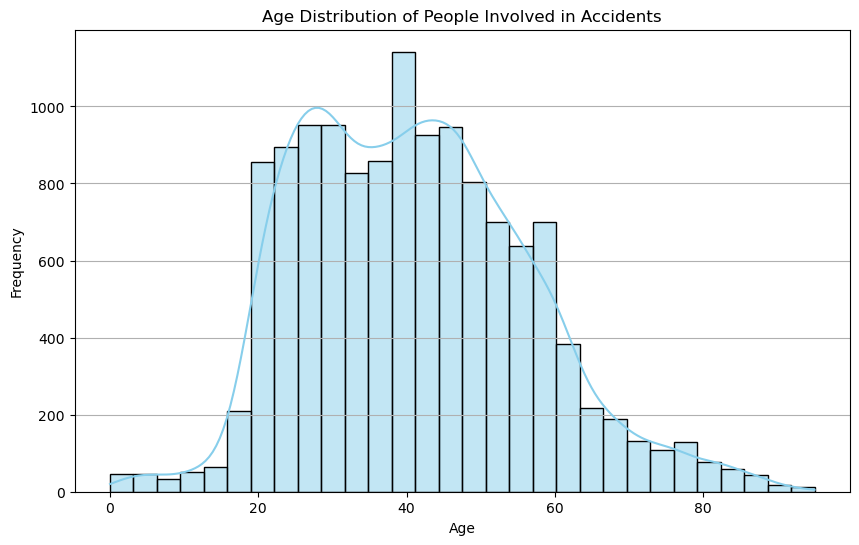

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(accidents_by_person2020['Age'].dropna(), bins=30, kde=True, color="skyblue")
plt.title('Age Distribution of People Involved in Accidents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

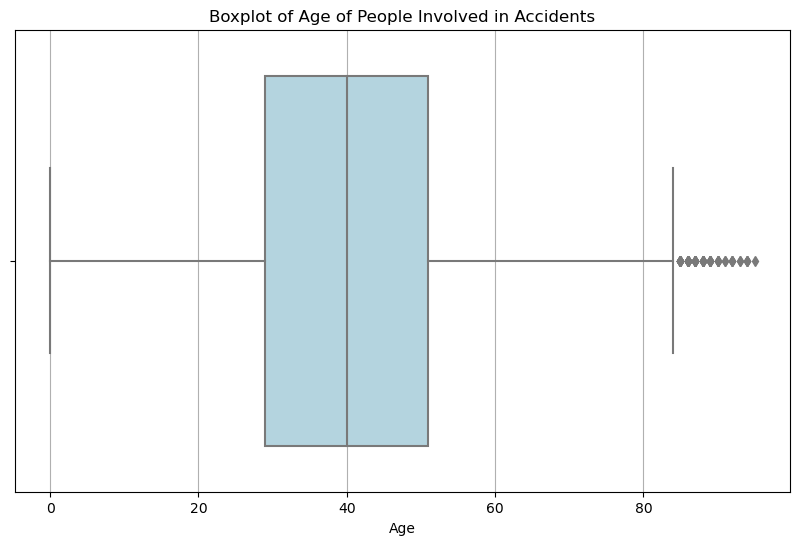

In [27]:
# Boxplot to highlight outliers and central tendencies.
plt.figure(figsize=(10, 6))
sns.boxplot(x=accidents_by_person2020['Age'], color="lightblue")
plt.title('Boxplot of Age of People Involved in Accidents')
plt.xlabel('Age')
plt.grid(axis='x')
plt.show()

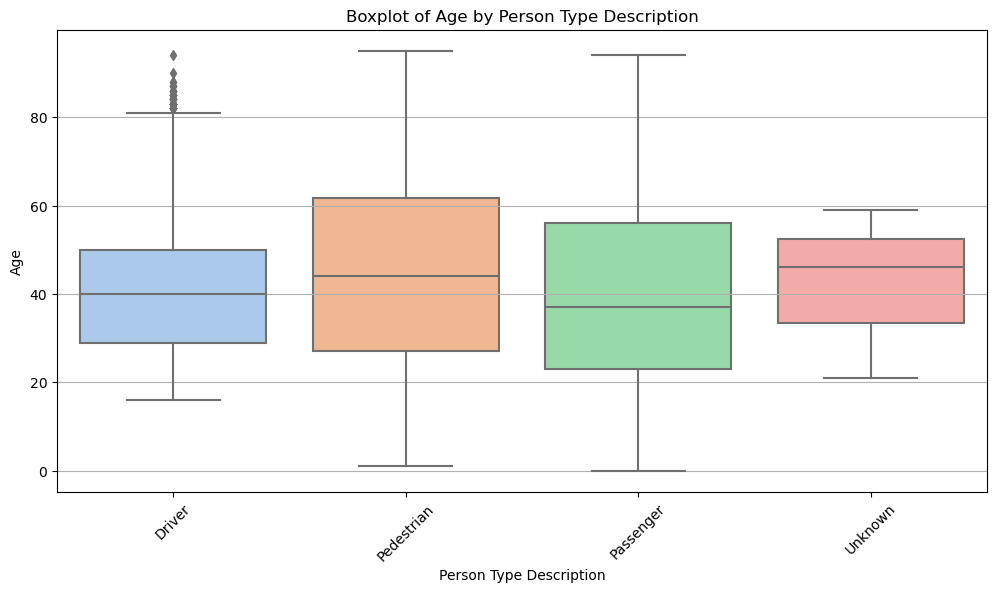

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Person_Type_Description', y='Age', data=accidents_by_person2020, palette="pastel")
plt.title('Boxplot of Age by Person Type Description')
plt.xlabel('Person Type Description')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

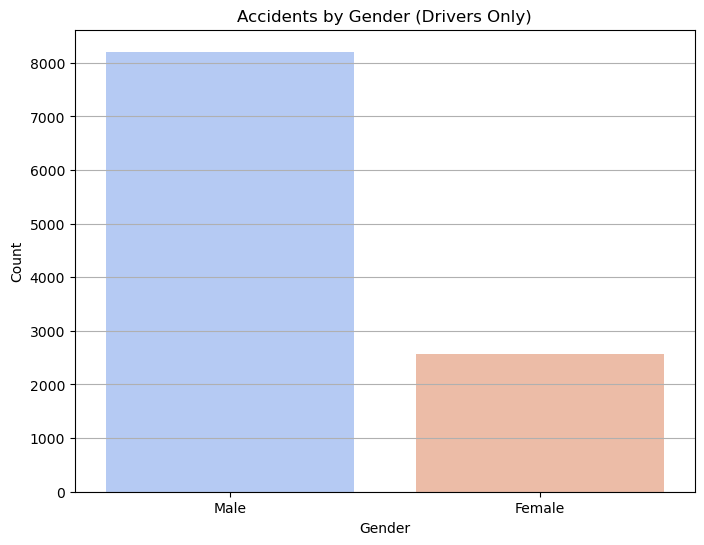

In [29]:
# Filter data for Person_Type_Description == "Driver" and ensure 'Gender' is not NaN
driver_data = accidents_by_person2020[
(accidents_by_person2020['Person_Type_Description'] == 'Driver') &
(accidents_by_person2020['Gender_Description'].notna())
]

# Bar plot for accidents by gender (drivers only)
gender_counts = driver_data['Gender_Description'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="coolwarm")
plt.title('Accidents by Gender (Drivers Only)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

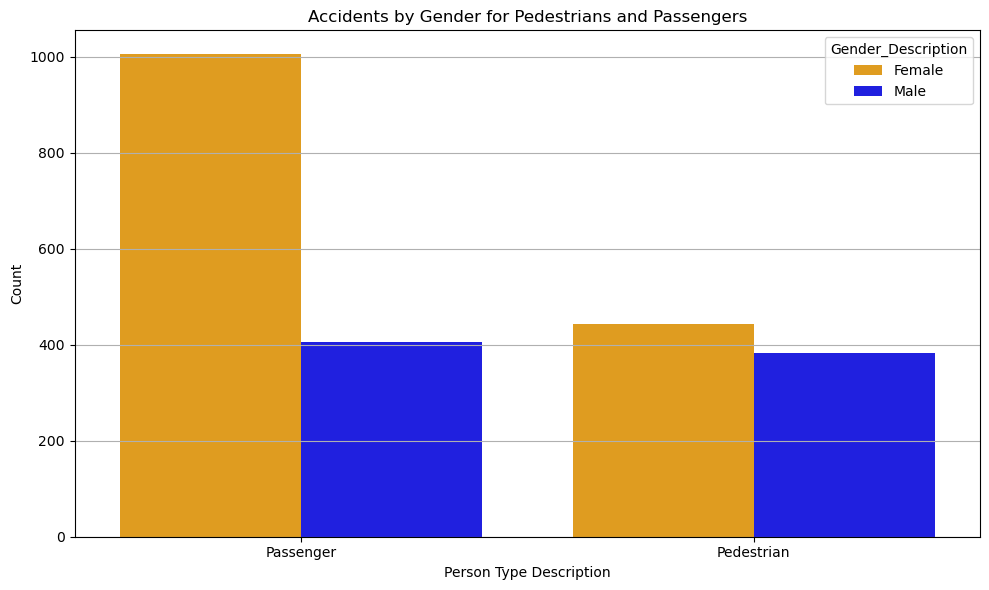

In [41]:
# Filter data for 'Pedestrian' and 'Passenger' and ensure 'Gender_Description' is not NaN
pedestrian_passenger_data = accidents_by_person2020[
    (accidents_by_person2020['Person_Type_Description'].isin(['Pedestrian', 'Passenger'])) &
    (accidents_by_person2020['Gender_Description'].notna())
]

# Group by 'Person_Type_Description' and 'Gender_Description', then count occurrences
gender_counts = pedestrian_passenger_data.groupby(['Person_Type_Description', 'Gender_Description']).size().reset_index(name='Count')

# Manually specify the colors for 'Male' and 'Female'
custom_palette = {'Male': 'blue', 'Female': 'orange'}

# Plot a bar plot for accidents by gender and person type
plt.figure(figsize=(10, 6))
sns.barplot(
    data=gender_counts, 
    x='Person_Type_Description', 
    y='Count', 
    hue='Gender_Description', 
    palette=custom_palette  # Apply the custom color palette
)

# Customize the plot
plt.title('Accidents by Gender for Pedestrians and Passengers')
plt.xlabel('Person Type Description')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()



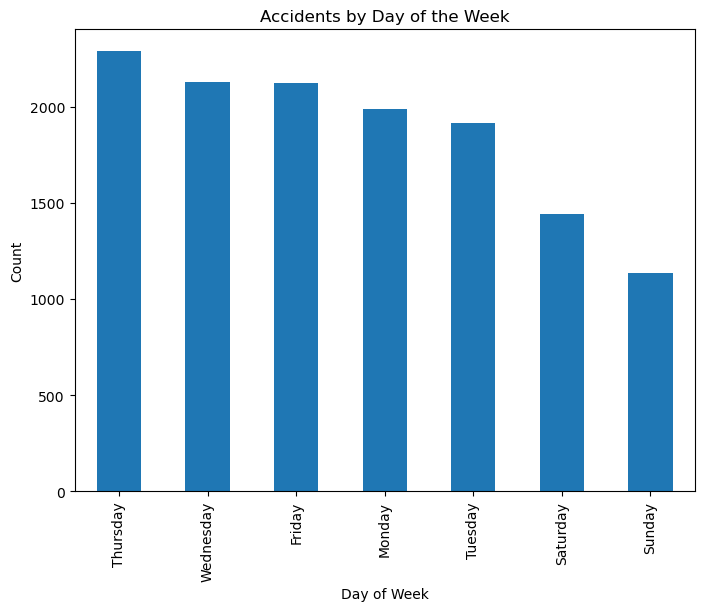

In [30]:
# Bar plot
day_counts = accidents_by_person2020['Day_of_Week'].value_counts()
day_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

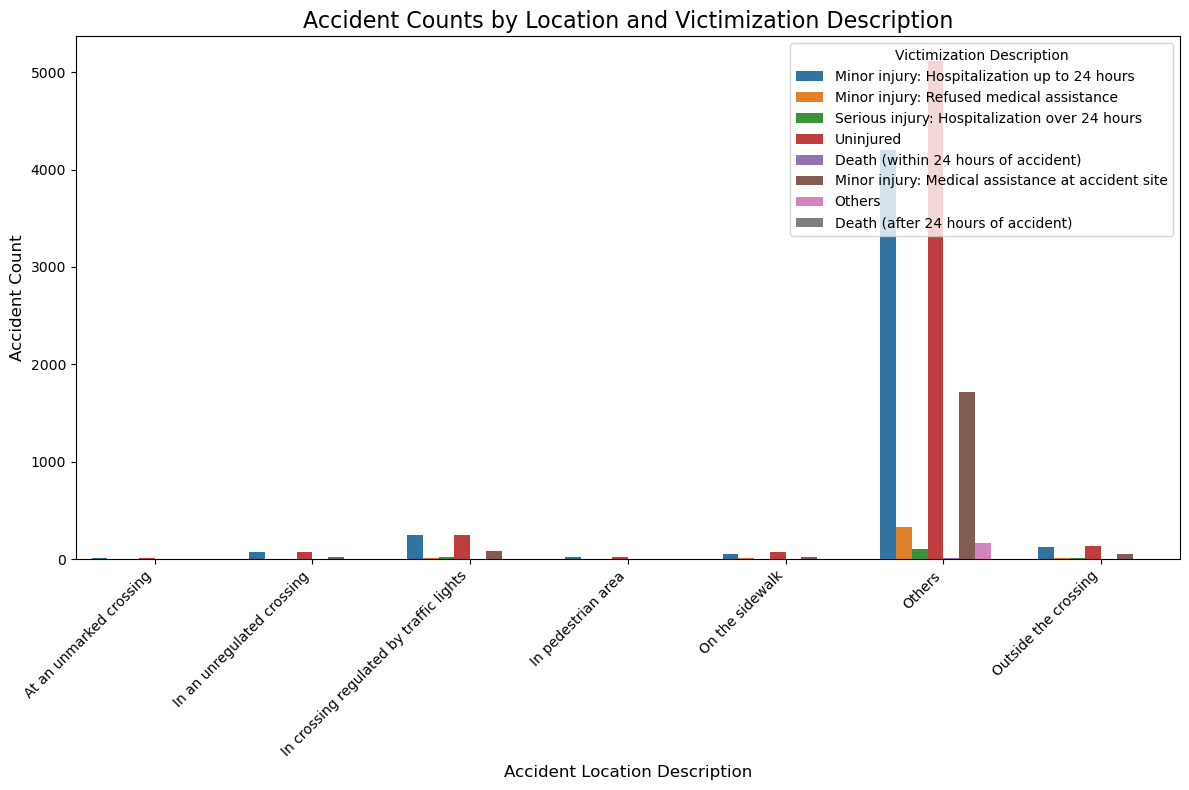

In [31]:
# Group and count the data
location_victim_counts = accidents_by_person2020.groupby(['Pedestrian_Accident_Location_Description', 'Victimization_Description']).size().reset_index(name='Count')

# Plot a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=location_victim_counts, 
    x='Pedestrian_Accident_Location_Description', 
    y='Count', 
    hue='Victimization_Description'
)

# Customize the plot
plt.title('Accident Counts by Location and Victimization Description', fontsize=16)
plt.xlabel('Accident Location Description', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Victimization Description')
plt.tight_layout()

# Show the plot
plt.show()


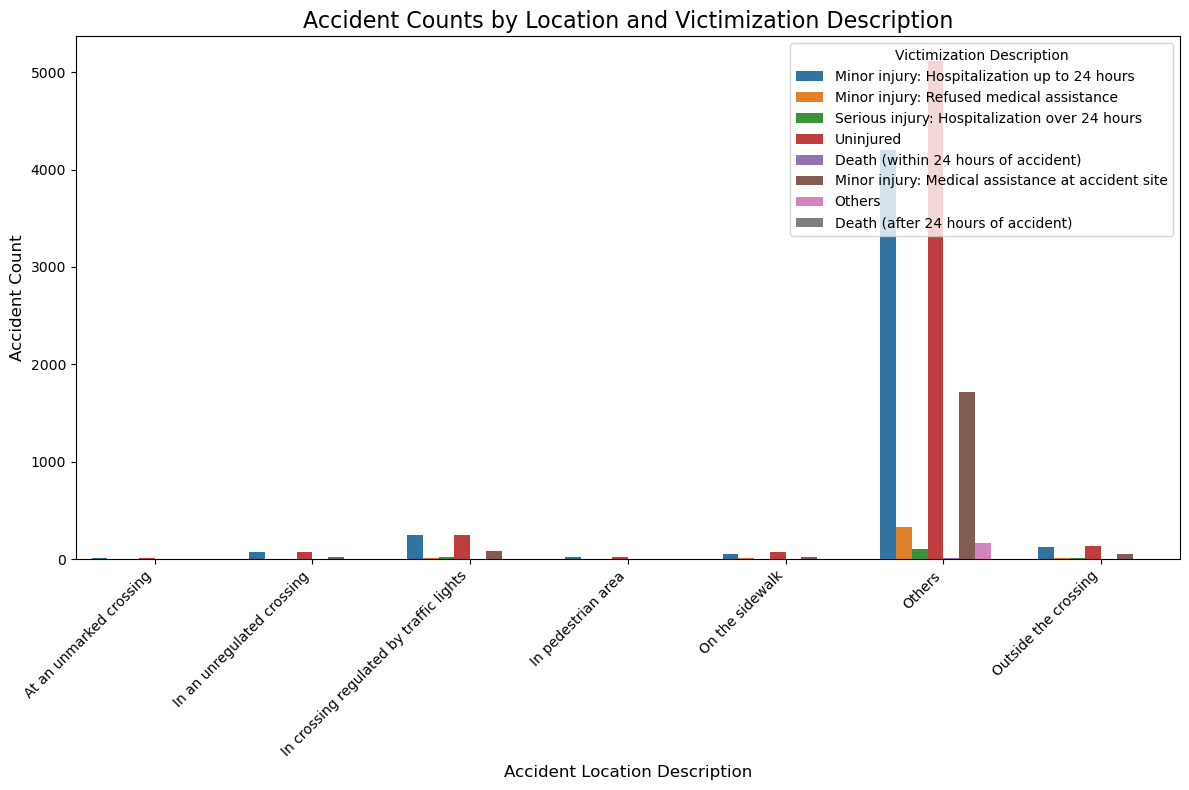

In [32]:
# Filter out rows where Pedestrian_Accident_Location_Description is 'Unknown' or similar
filtered_data = accidents_by_person2020[accidents_by_person2020['Pedestrian_Accident_Location_Description'] != 'Unknown']

# Group and count the data
location_victim_counts = filtered_data.groupby(['Pedestrian_Accident_Location_Description', 'Victimization_Description']).size().reset_index(name='Count')

# Plot a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=location_victim_counts, 
    x='Pedestrian_Accident_Location_Description', 
    y='Count', 
    hue='Victimization_Description'
)

# Customize the plot
plt.title('Accident Counts by Location and Victimization Description', fontsize=16)
plt.xlabel('Accident Location Description', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Victimization Description')
plt.tight_layout()

# Show the plot
plt.show()


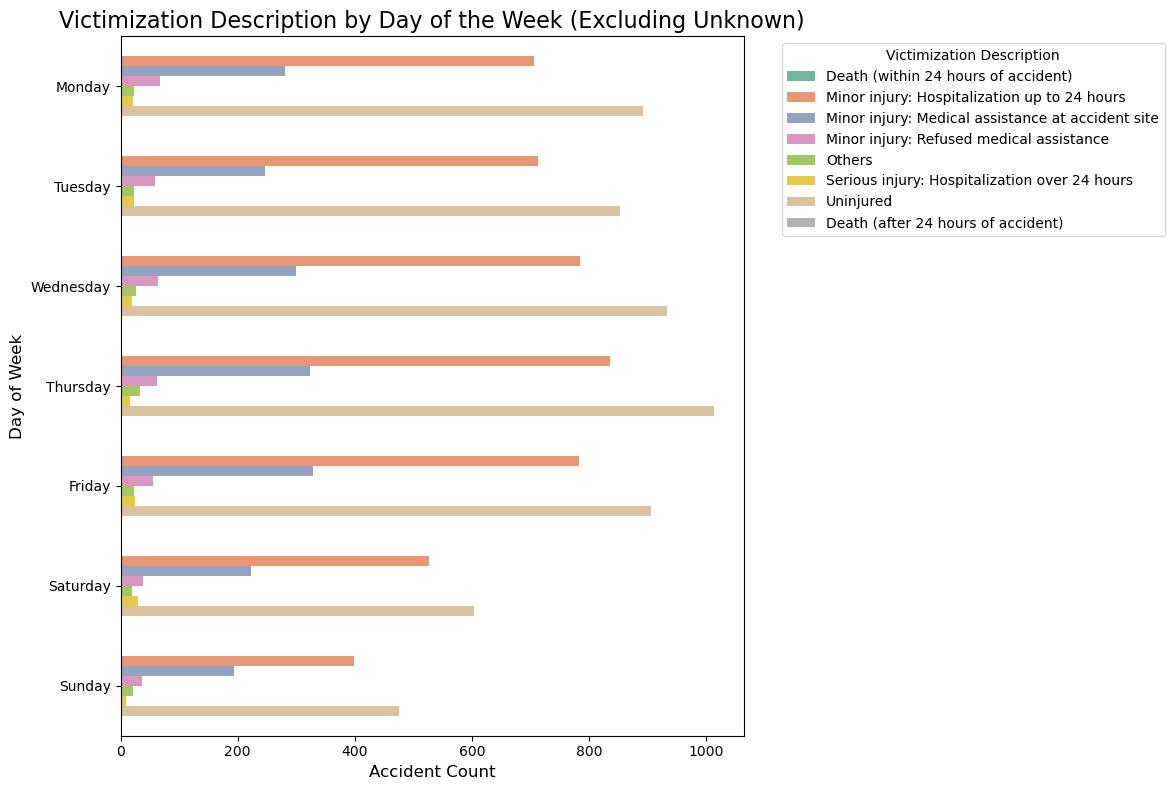

In [33]:
# Define the order of days of the week (optional if you want Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Filter out rows where 'Victimization_Description' is 'Unknown'
filtered_data = accidents_by_person2020[
    (accidents_by_person2020['Victimization_Description'] != 'Unknown') 
]

# Group the data by 'Day_of_Week' and 'Victimization_Description', then count occurrences
victimization_day_counts = filtered_data.groupby(['Day_of_Week', 'Victimization_Description']).size().reset_index(name='Count')

# Plot a horizontal bar chart with ordered days of the week
plt.figure(figsize=(12, 8))
sns.barplot(
    data=victimization_day_counts, 
    y='Day_of_Week',  # Set 'Day_of_Week' to 'y' for horizontal bars
    x='Count',  # Set 'Count' to 'x' for horizontal bars
    hue='Victimization_Description', 
    palette='Set2',
    order=day_order  # Set the order of days here
)

# Customize the plot
plt.title('Victimization Description by Day of the Week (Excluding Unknown)', fontsize=16)
plt.xlabel('Accident Count', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.legend(title='Victimization Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [34]:
accidents_by_person2020['Victimization_Description'].unique()

array(['Uninjured', 'Minor injury: Hospitalization up to 24 hours',
       'Minor injury: Refused medical assistance',
       'Minor injury: Medical assistance at accident site',
       'Death (within 24 hours of accident)',
       'Serious injury: Hospitalization over 24 hours', 'Others',
       'Death (after 24 hours of accident)'], dtype=object)

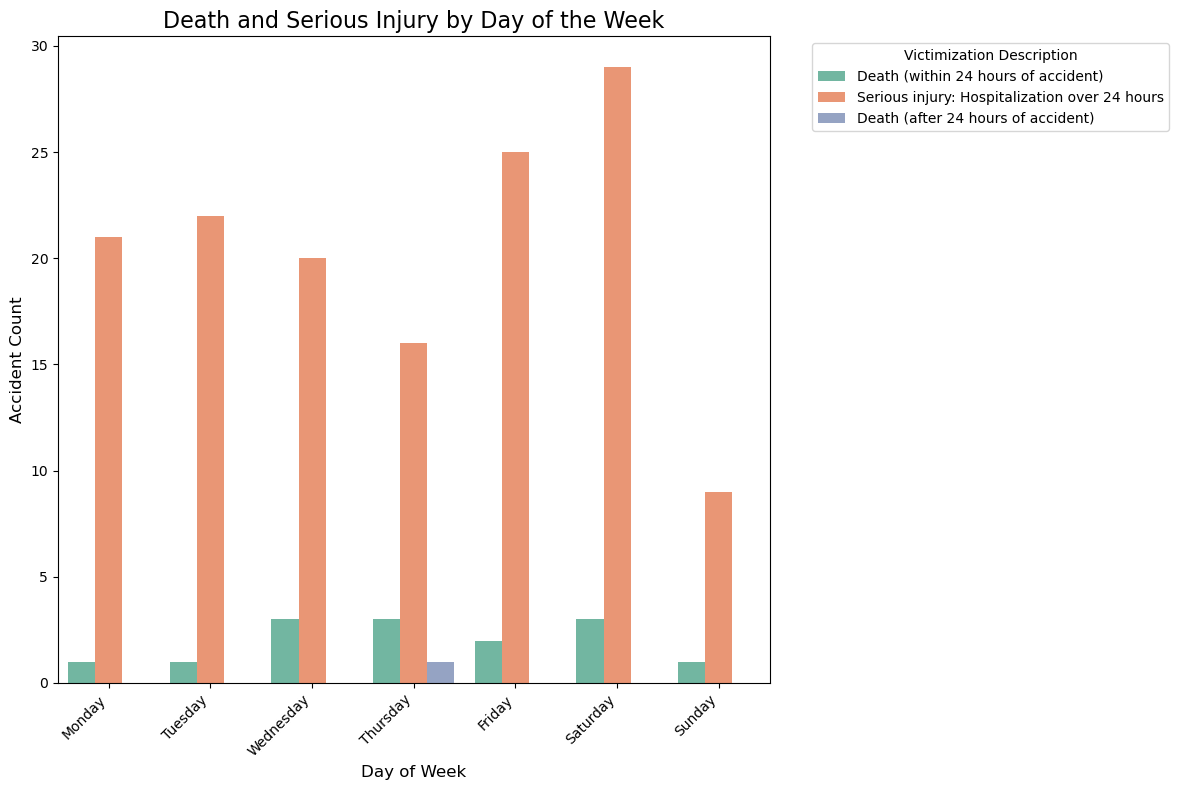

In [35]:
# Define the order of days of the week (optional if you want Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Filter for rows where 'Victimization_Description' is 'Death' or 'Serious injury'
filtered_data = accidents_by_person2020[
    accidents_by_person2020['Victimization_Description'].isin([
        'Death (within 24 hours of accident)', 
        'Serious injury: Hospitalization over 24 hours', 
        'Death (after 24 hours of accident)'
    ])
]

# Group by 'Day_of_Week' and 'Victimization_Description', then count occurrences
victimization_day_counts = filtered_data.groupby(['Day_of_Week', 'Victimization_Description']).size().reset_index(name='Count')

# Plot a bar chart with ordered days of the week
plt.figure(figsize=(12, 8))
sns.barplot(
    data=victimization_day_counts, 
    x='Day_of_Week', 
    y='Count', 
    hue='Victimization_Description', 
    palette='Set2',
    order=day_order  # Set the order of days here
)

# Customize the plot
plt.title('Death and Serious Injury by Day of the Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Victimization Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


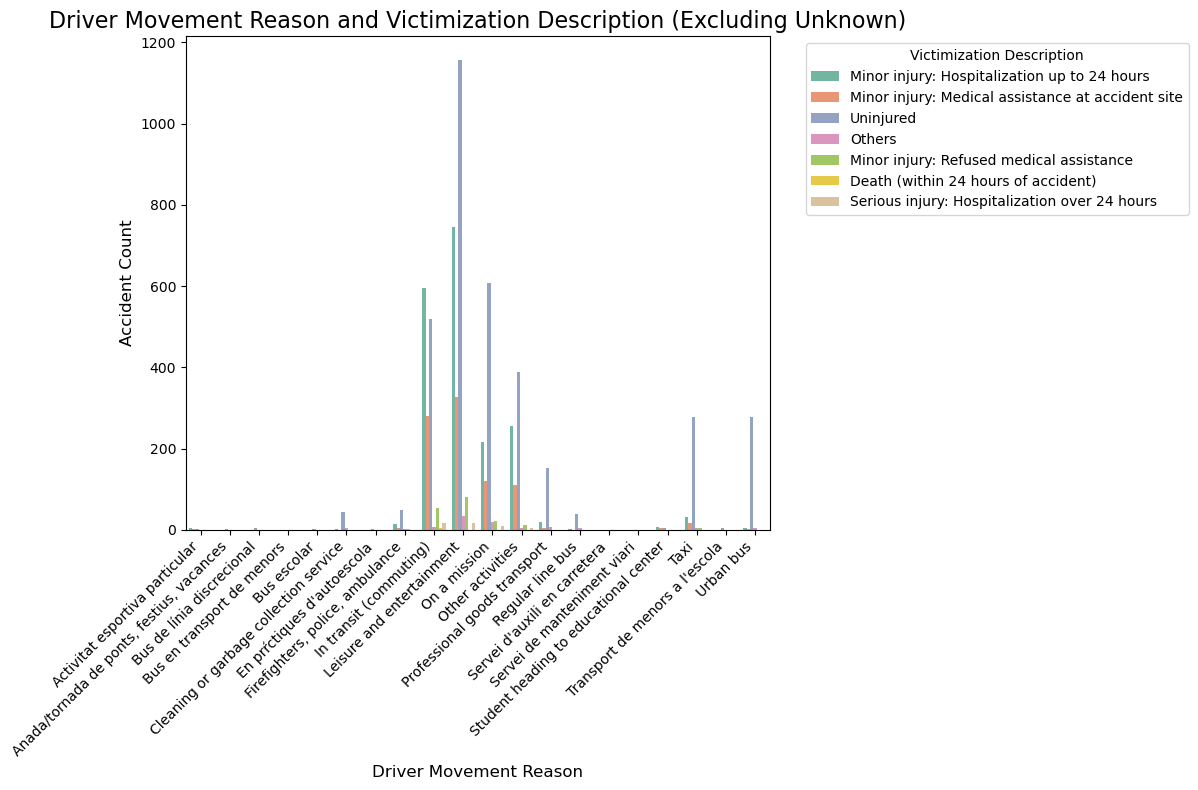

In [36]:
# Filter out rows where 'Driver_Movement_Reason_Description' or 'Victimization_Description' is 'Unknown'
filtered_data = accidents_by_person2020[
    (accidents_by_person2020['Driver_Movement_Reason_Description'] != 'Unknown') &
    (accidents_by_person2020['Victimization_Description'] != 'Unknown')
]

# Group the data by 'Driver_Movement_Reason_Description' and 'Victimization_Description', then count occurrences
movement_victimization_counts = filtered_data.groupby(['Driver_Movement_Reason_Description', 'Victimization_Description']).size().reset_index(name='Count')

# Plot a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=movement_victimization_counts, 
    x='Driver_Movement_Reason_Description', 
    y='Count', 
    hue='Victimization_Description', 
    palette='Set2'
)

# Customize the plot
plt.title('Driver Movement Reason and Victimization Description (Excluding Unknown)', fontsize=16)
plt.xlabel('Driver Movement Reason', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Victimization Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [37]:
# the graph on top I should perform in a normal size after joining tables about drivers mistake and victimization type

In [38]:
# also there are some untranslated values that neede to be translated

In [45]:
accidents_by_person2020.head()

,Case_Number,District_Name,Neighborhood_Name,Street_Name,Day_of_Week,Date,Day_Type_Description,Year,Month_of_Year,Month_Name,...,Age,Person_Type_Description,Pedestrian_Accident_Location_Description,Pedestrian_Movement_Reason_Description,Driver_Movement_Reason_Description,Victimization_Description,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
0,2020S000001,Horta-Guinardó,la Font d'en Fargues,Maragall,Wednesday,2020-01-01,Laboral,2020,1,January,...,29,Driver,Others,Unknown,Unknown,Uninjured,430501.45,4586751.53,2.167116,41.427474
1,2020S000002,Sants-Montjuďc,la Bordeta,Corts Catalanes,Wednesday,2020-01-01,Laboral,2020,1,January,...,26,Pedestrian,In crossing regulated by traffic lights,Leisure and entertainment,Unknown,Minor injury: Hospitalization up to 24 hours,428225.71,4580279.72,2.140650,41.368985
2,2020S000002,Sants-Montjuďc,la Bordeta,Corts Catalanes,Wednesday,2020-01-01,Laboral,2020,1,January,...,31,Driver,In crossing regulated by traffic lights,Unknown,Taxi,Uninjured,428225.71,4580279.72,2.140650,41.368985
3,2020S000003,Eixample,l'Antiga Esquerra de l'Eixample,Sarriŕ,Wednesday,2020-01-01,Laboral,2020,1,January,...,42,Driver,Others,Unknown,Leisure and entertainment,Minor injury: Hospitalization up to 24 hours,428532.59,4582672.59,2.144037,41.390564
4,2020S000003,Eixample,l'Antiga Esquerra de l'Eixample,Sarriŕ,Wednesday,2020-01-01,Laboral,2020,1,January,...,36,Driver,Others,Unknown,Taxi,Uninjured,428532.59,4582672.59,2.144037,41.390564


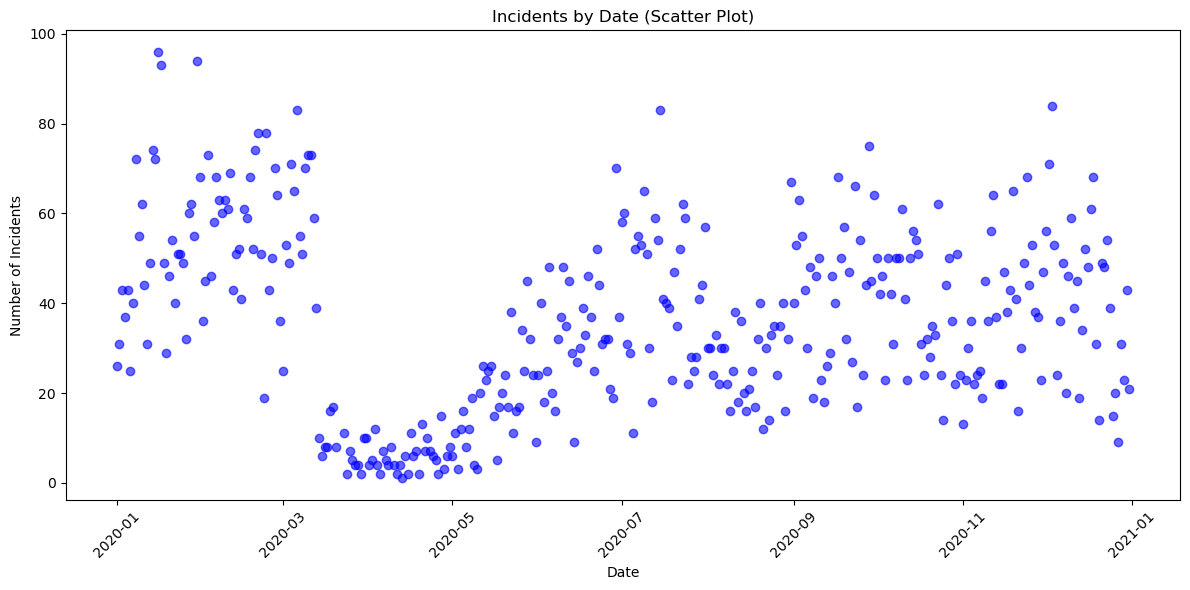

In [44]:
# Make sure 'Date' is in datetime format
accidents_by_person2020['Date'] = pd.to_datetime(accidents_by_person2020['Date'], errors='coerce')

# Group by 'Date' and count the incidents
incident_counts = accidents_by_person2020.groupby('Date').size().reset_index(name='Incident Count')

# Plotting the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(incident_counts['Date'], incident_counts['Incident Count'], color='blue', alpha=0.6)

# Customize the plot
plt.title('Incidents by Date (Scatter Plot)')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
# Group by 'Street_Name' and count accidents for each street
street_accidents = accidents_by_person2020.groupby('Street_Name').size().reset_index(name='Accident Count')

# Get the street with the most accidents
top_street = street_accidents.loc[street_accidents['Accident Count'].idxmax()]

# Filter data for the top street
top_street_data = accidents_by_person2020[accidents_by_person2020['Street_Name'] == top_street['Street_Name']]

# Create a base map centered on the average location of the top street accidents
average_lat = top_street_data['Latitud'].mean()
average_lon = top_street_data['Longitud'].mean()

mymap = folium.Map(location=[average_lat, average_lon], zoom_start=14)

# Plot all accidents for the top street
for index, row in top_street_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(mymap)

# Add a marker for the street with the most accidents
folium.Marker(
    location=[average_lat, average_lon],
    popup=f"Top Street: {top_street['Street_Name']} with {top_street['Accident Count']} accidents",
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(mymap)


mymap

The map displays a visual representation of all the accidents that occurred on the street with the most accidents. Each accident is represented by a blue circular marker.
A red marker is placed in the center of the top street, showing the street's name and accident count.

You can interact with the map by zooming in/out and clicking on the markers for more details.


In [51]:
# Group by 'Neighborhood_Name' and count accidents for each neighborhood
neighborhood_accidents = accidents_by_person2020.groupby('Neighborhood_Name').size().reset_index(name='Accident Count')

# Sort the neighborhoods by accident count in descending order
sorted_neighborhood_accidents = neighborhood_accidents.sort_values(by='Accident Count', ascending=False)

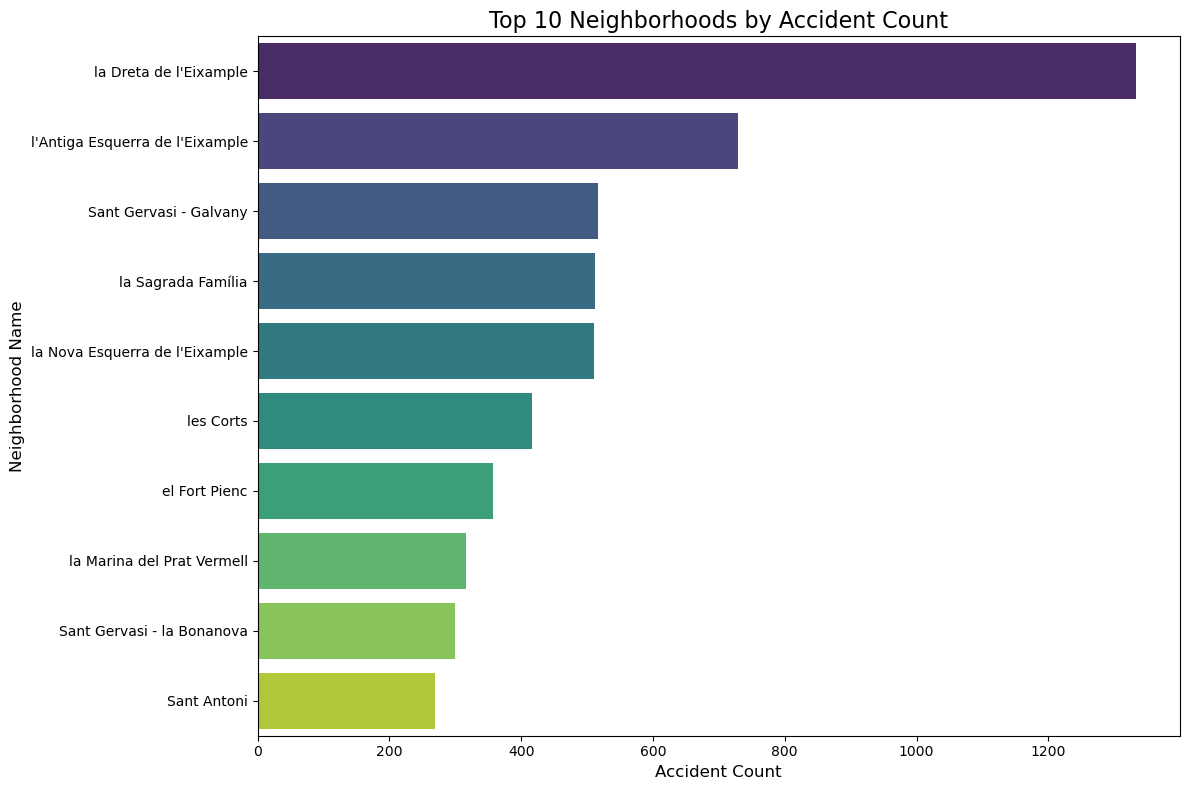

In [52]:
# Plot a bar chart for the number of accidents per neighborhood
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_neighborhood_accidents.head(10), x='Accident Count', y='Neighborhood_Name', palette='viridis')

# Customize the plot
plt.title('Top 10 Neighborhoods by Accident Count', fontsize=16)
plt.xlabel('Accident Count', fontsize=12)
plt.ylabel('Neighborhood Name', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [54]:
# Group by 'Person_Type_Description' and 'Victimization_Description' and count occurrences
person_victimization_counts = accidents_by_person2020.groupby(
    ['Person_Type_Description', 'Victimization_Description']
).size().reset_index(name='Accident Count')


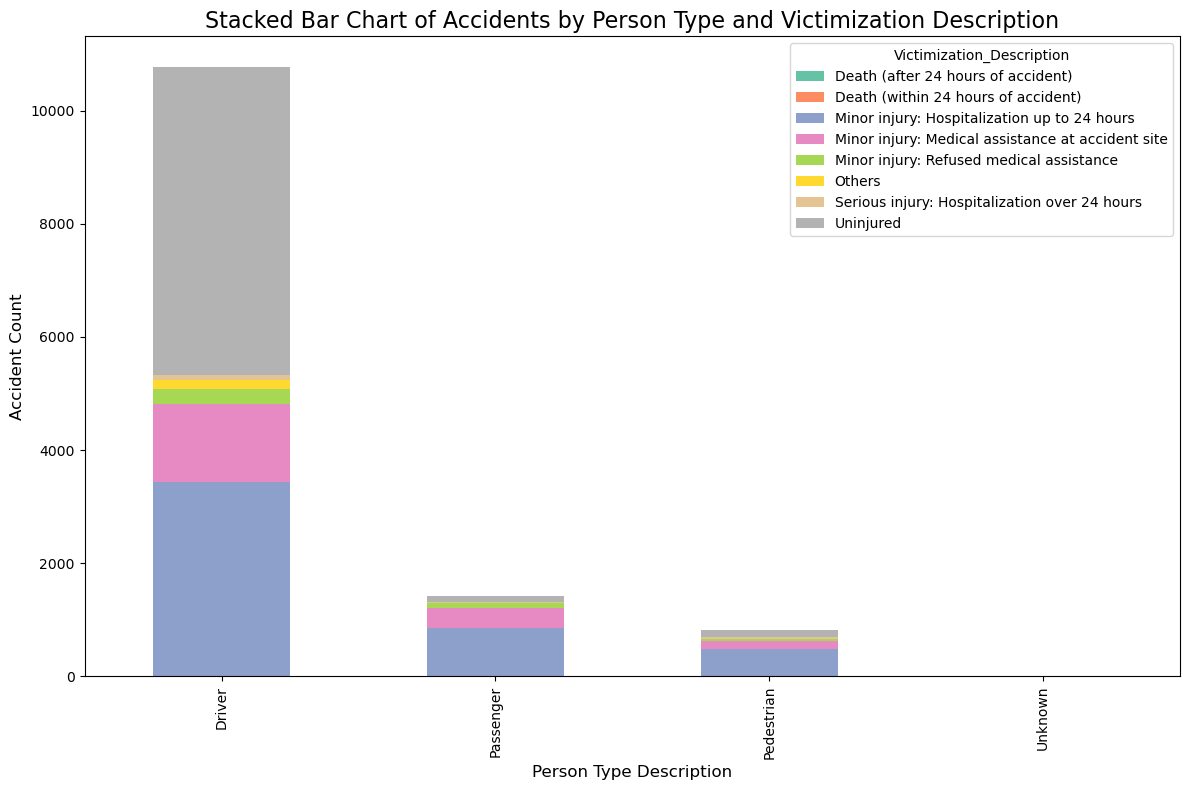

In [55]:
# Pivot the data to create a stacked bar chart
pivot_data = person_victimization_counts.pivot_table(
    index='Person_Type_Description', 
    columns='Victimization_Description', 
    values='Accident Count', 
    aggfunc='sum', 
    fill_value=0
)

# Plot the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set2')

# Customize the plot
plt.title('Stacked Bar Chart of Accidents by Person Type and Victimization Description', fontsize=16)
plt.xlabel('Person Type Description', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

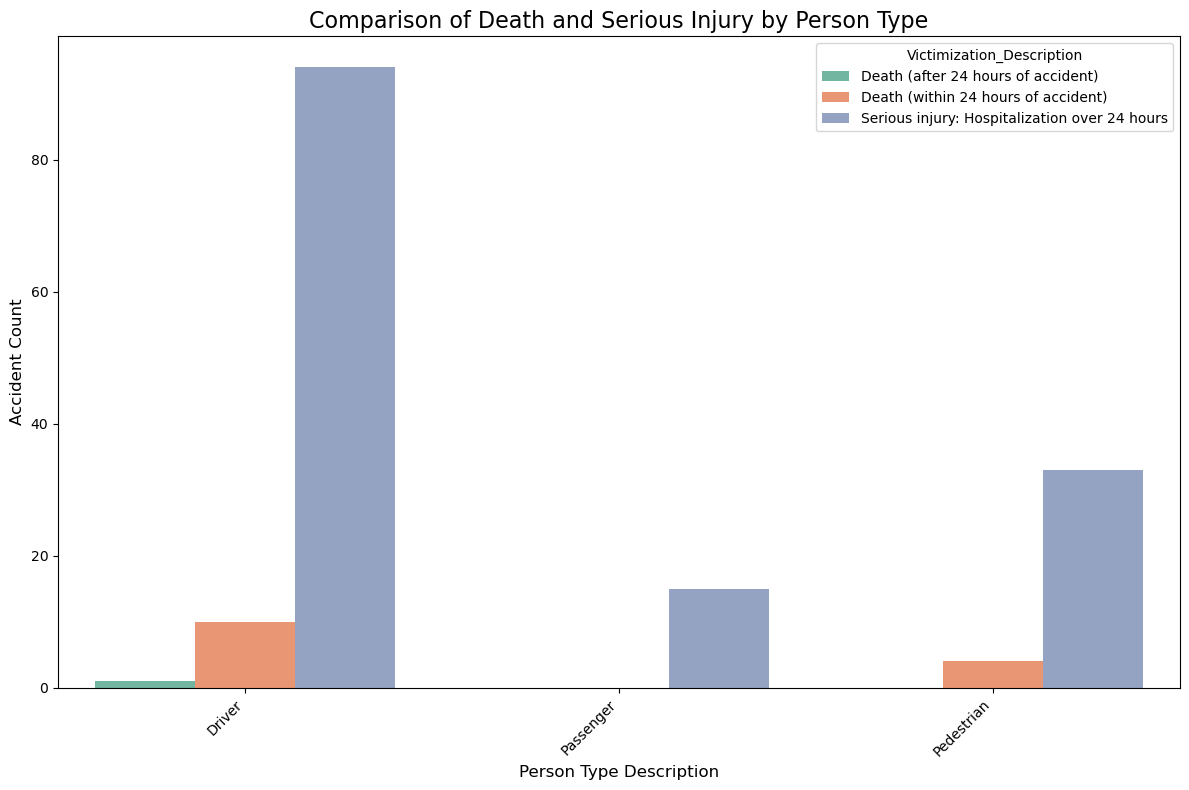

In [56]:
# Step 1: Filter the data for 'Death' and 'Serious Injury' in Victimization_Description
victimization_types = [
    'Death (within 24 hours of accident)',
    'Serious injury: Hospitalization over 24 hours',
    'Death (after 24 hours of accident)'
]

filtered_data = accidents_by_person2020[
    accidents_by_person2020['Victimization_Description'].isin(victimization_types)
]

# Step 2: Group by 'Person_Type_Description' and 'Victimization_Description', then count occurrences
victimization_counts = filtered_data.groupby(
    ['Person_Type_Description', 'Victimization_Description']
).size().reset_index(name='Accident Count')

# Step 3: Create a bar plot to compare the counts of Death and Serious Injury for each Person Type
plt.figure(figsize=(12, 8))
sns.barplot(
    data=victimization_counts, 
    x='Person_Type_Description', 
    y='Accident Count', 
    hue='Victimization_Description', 
    palette='Set2'
)

# Customize the plot
plt.title('Comparison of Death and Serious Injury by Person Type', fontsize=16)
plt.xlabel('Person Type Description', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()